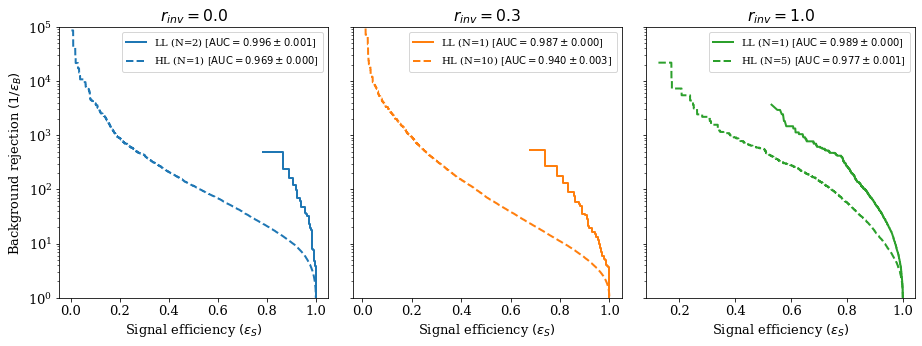

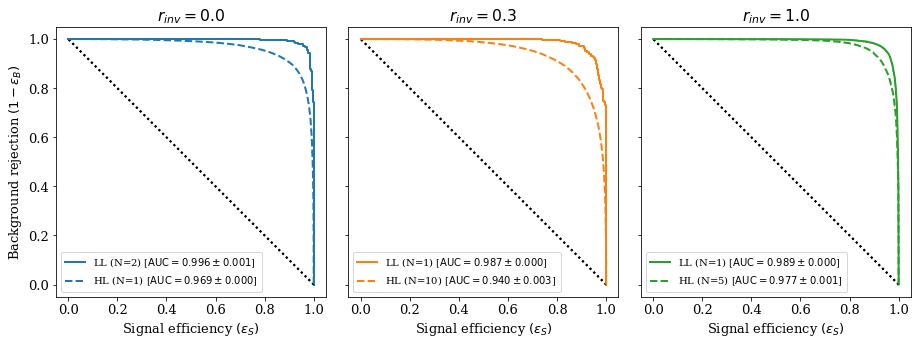

In [6]:
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import numpy as np
from scipy import signal
import pathlib
path = pathlib.Path.cwd()

plt.rcParams["font.family"] = "serif"
matplotlib.rcParams.update({'font.size': 13})

rinvs = ["0p0", "0p3", "1p0"]
data_types = ["LL", "HL"]
colors = ["tab:blue", "tab:orange", "tab:green"]

bkgRej_log = True

for bkgRej_log in (True, False):
    fig, axs = plt.subplots(1, 3, figsize=(13, 5), sharey=True)
    for rix, rinv in enumerate(rinvs):
        for data_type in data_types:
            auc_file = path.parent / f'{data_type}_training' / 'bootstrap_results' / rinv / 'aucs.csv'
            if auc_file.exists():
                aucs = pd.read_csv(auc_file).auc.values
                auc_avg, auc_ci = np.mean(aucs), np.percentile(aucs, (2.5, 97.5))
                auc_ci_max = max(np.abs(auc_ci[0] - auc_avg), np.abs(auc_ci[1] - auc_avg))
                roc_path = path.parent / f'{data_type}_training' / 'bootstrap_results' / rinv / 'roc'
                for ix, (roc_file, auc) in enumerate(zip(list(roc_path.glob('*')), aucs)):
                    roc_df = pd.read_csv(roc_file, index_col=0)
                    rinv_str = rinv.replace("p", ".")
                    if data_type == "HL":
                        ls = "--"
                    else:
                        ls = "-"
                    label = '%s (N=%s) [$\mathrm{AUC} = %0.3f \pm %0.3f$]' %(data_type, len(aucs), auc_avg, auc_ci_max)
                    alpha = 1
                    axs[rix].set_title("$r_{inv} = %s$" %rinv_str)
                    if bkgRej_log:
                        axs[rix].plot(roc_df.sig_eff, 1. / roc_df.bkg_eff, lw=2, color=colors[rix], alpha=alpha, linestyle=ls, label=label)
                        axs[0].set_ylabel('Background rejection $(1 / \epsilon_B)$')
                        plt.yscale('log')
                        plt.ylim(bottom=1, top=1e5)
                        axs[rix].legend(loc='upper right', fontsize="10")
                        plt.savefig(path.parent / "figures" / "bootstrap_roc.png")
                        plt.savefig(path.parent / "figures" / "bootstrap_roc.pdf")
                    else:
                        axs[rix].plot([1,0], [0,1], lw=2, color="k", linestyle="dotted")
                        axs[rix].plot(roc_df.sig_eff, 1. - roc_df.bkg_eff, lw=2, color=colors[rix], alpha=alpha, linestyle=ls, label=label)
                        axs[0].set_ylabel('Background rejection $(1 - \epsilon_B)$')
                        axs[rix].legend(loc='lower left', fontsize="10")
                        axs[rix].set_aspect('equal')
                        plt.savefig(path.parent / "figures" / "log_bootstrap_roc.png")
                        plt.savefig(path.parent / "figures" / "log_bootstrap_roc.pdf")
                    axs[rix].set_xlabel('Signal efficiency $(\epsilon_S)$')
                    #axs[rix].set_xlim(left=0, right=1)
                    if ix == 0:
                        break


    plt.subplots_adjust(wspace=0.1)
    plt.tight_layout()